# K-Means

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Synthetic Dataset for K-Means Clustering')

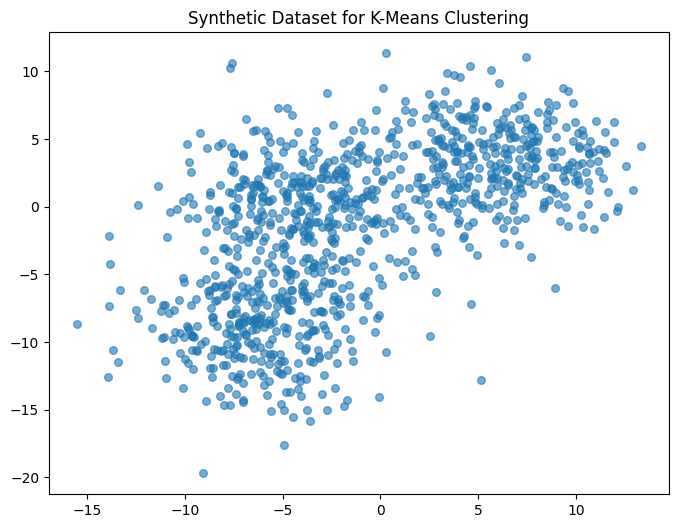

In [2]:
data = make_blobs(n_samples=1000, centers=3, cluster_std=3, random_state=17)
X, _ = data

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
plt.title('Synthetic Dataset for K-Means Clustering')

## 1. K-Means from scratch

### Step 1: Initialize random centroids

In [3]:
K = 3

random_ = np.random.RandomState(seed=17)
initial_centroids_indices = random_.choice(X.shape[0], K, replace=False)
centroids = X[initial_centroids_indices]

centroids

array([[-5.67283406,  2.33097131],
       [ 0.54564686,  2.37307794],
       [-1.89125267, -4.00533549]])

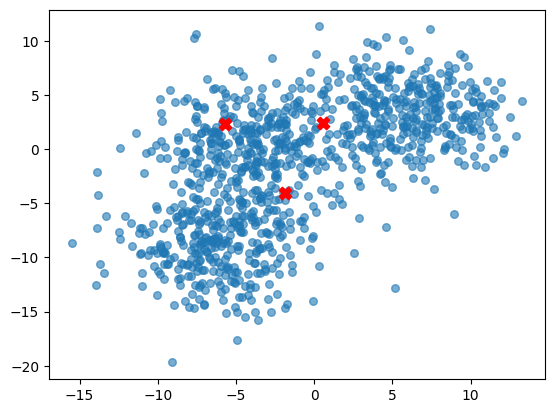

In [4]:
# Plot centroids
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)

for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color="red", marker='X', s=80)

plt.show()


### Step 2: Compute distance matrix

In [5]:
# Compute squared distances from centroids to all points
centroids_squared = np.sum(centroids**2, axis=1) # shape (K,); sum of c0**2 + c1**2 + ... + cd**2
X_squared = np.sum(X**2, axis=1)  # shape (n_samples,); sum of x0**2 + x1**2 + ... + xd**2
D_squared = centroids_squared.reshape(1, -1) + X_squared.reshape(-1, 1) - 2 * X @ centroids.T # shape (n_samples, K)
D_squared.shape

(1000, 3)

### Step 3: Assign to clusters

In [6]:
labels = np.argmin(D_squared, axis=1)
labels[:10]

array([0, 1, 2, 1, 2, 1, 0, 2, 2, 1])

In [7]:

def plot_clusters(X, labels, centroids=None):
    plt.figure(figsize=(8, 6))
    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.6, label=f'Cluster {k}')
        plt.scatter(centroids[:, 0], centroids[:, 1], color="red", marker='X', s=80, label=f'Centroids' if k== 0 else "")
    plt.legend()
    return plt.gca()

Text(0.5, 1.0, 'K-Means Clustering with Initial Centroids')

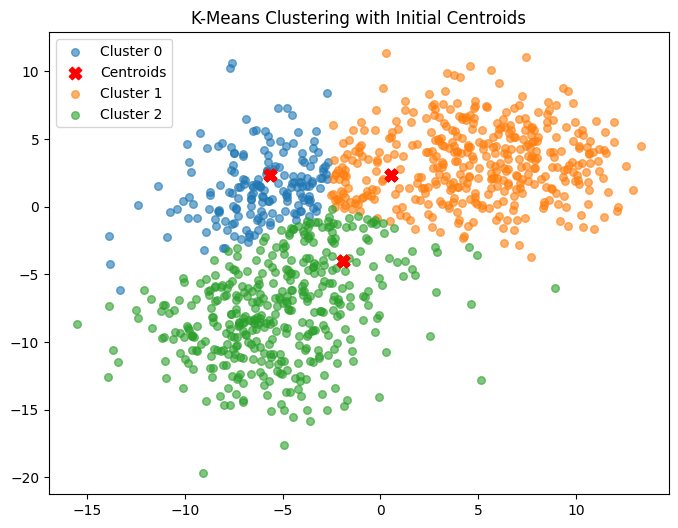

In [8]:
ax = plot_clusters(X, labels, centroids=centroids)
ax.set_title('K-Means Clustering with Initial Centroids')

### Step 4: Update centroids

Text(0.5, 1.0, 'K-Means Clustering after One Update of Centroids')

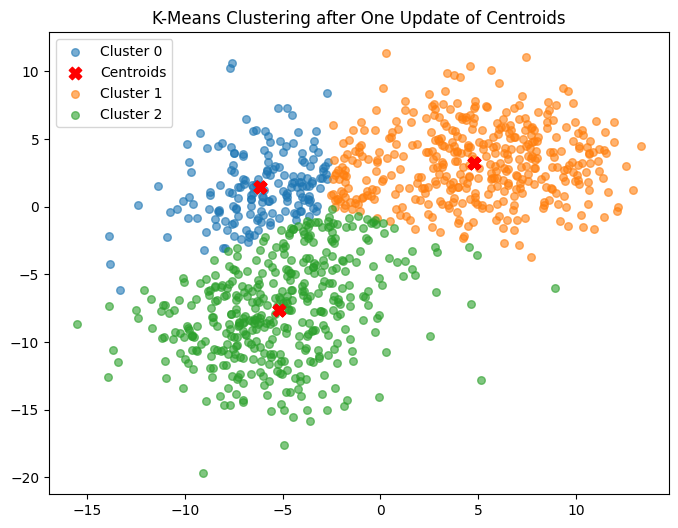

In [9]:
for k in range(K):
    cluster_points = X[labels == k]
    new_centroid = np.mean(cluster_points, axis=0)
    centroids[k] = new_centroid

ax = plot_clusters(X, labels, centroids=centroids)
ax.set_title('K-Means Clustering after One Update of Centroids')

## Step 5: Repeat n_iterations

In [10]:
def initialize_centroids(X, K, random_state=17):
    random_ = np.random.RandomState(seed=random_state)
    initial_centroids_indices = random_.choice(X.shape[0], K, replace=False)
    centroids = X[initial_centroids_indices]
    return centroids

def compute_squared_distances(X, centroids):
    centroids_squared = np.sum(centroids**2, axis=1) # shape (K,)
    X_squared = np.sum(X**2, axis=1)  # shape (n_samples,)
    D_squared = centroids_squared.reshape(1, -1) + X_squared.reshape(-1, 1) - 2 * X @ centroids.T
    return D_squared

def kmeans(X, K, n_iterations=10, random_state=17):
    centroids = initialize_centroids(X, K, random_state=random_state)

    for i in range(n_iterations):
        D_squared = compute_squared_distances(X, centroids)
        labels = np.argmin(D_squared, axis=1)

        for k in range(K):
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)

    return centroids, labels

Text(0.5, 1.0, 'K-Means Clustering after 10 iterations')

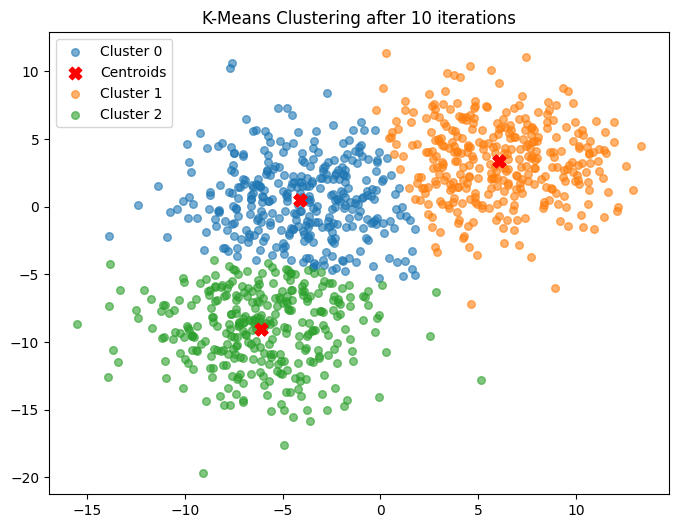

In [11]:
n_iterations = 10
centroids, labels = kmeans(X, K, n_iterations=n_iterations, random_state=17)

ax = plot_clusters(X, labels, centroids=centroids)
ax.set_title(f'K-Means Clustering after {n_iterations} iterations')

## 2. K-Means from sklearn

Text(0.5, 1.0, 'K-Means Clustering using scikit-learn')

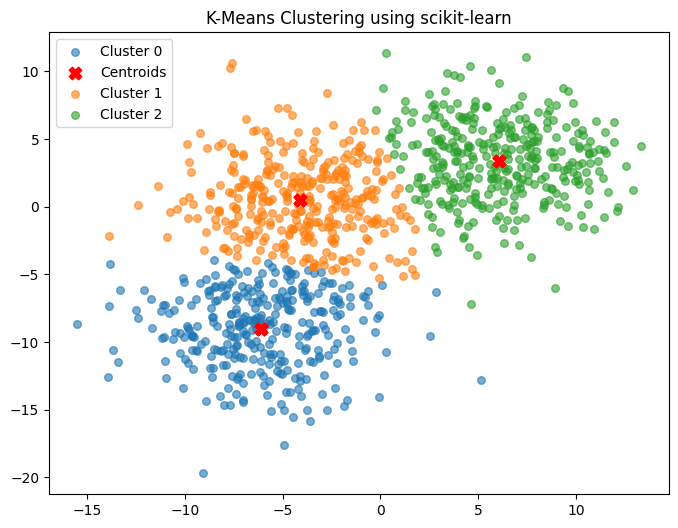

In [12]:
from sklearn.cluster import KMeans

sk_kmeans = KMeans(n_clusters=K, max_iter=n_iterations, random_state=17)
sk_kmeans.fit(X)
sk_labels = sk_kmeans.labels_
sk_centroids = sk_kmeans.cluster_centers_

ax = plot_clusters(X, sk_labels, centroids=sk_centroids)
ax.set_title('K-Means Clustering using scikit-learn')

## 3. Which K is best?

### Inertial SSE

In [13]:
def compute_inertial_sse(X, centroids):
    sse = 0
    for sample, centroid in zip(X, centroids):
        d_squared = np.sum((sample - centroid)**2)
        sse += d_squared
    return sse

In [28]:
def assign_centroids(X, centroids, labels):
    sample_centroids = []
    n_samples = X.shape[0]
    for i in range(n_samples):
        sample_centroid = centroids[labels[i]]
        sample_centroids.append(sample_centroid)
    return sample_centroids


In [30]:
candidate_k = range(2, 11) # Check k from 2 to 10
sse_list = []

for k in candidate_k:
    centroids, labels = kmeans(X, k, n_iterations=100, random_state=17)
    X_centroids = assign_centroids(X, centroids, labels)
    sse = compute_inertial_sse(X, X_centroids)
    sse_list.append(sse)
    print(f'k={k}, SSE={sse:.2f}')


k=2, SSE=30439.47
k=3, SSE=16804.18
k=4, SSE=14429.95
k=5, SSE=12528.94
k=6, SSE=10517.69
k=7, SSE=9119.61
k=8, SSE=8516.47
k=9, SSE=7173.77
k=10, SSE=6411.68


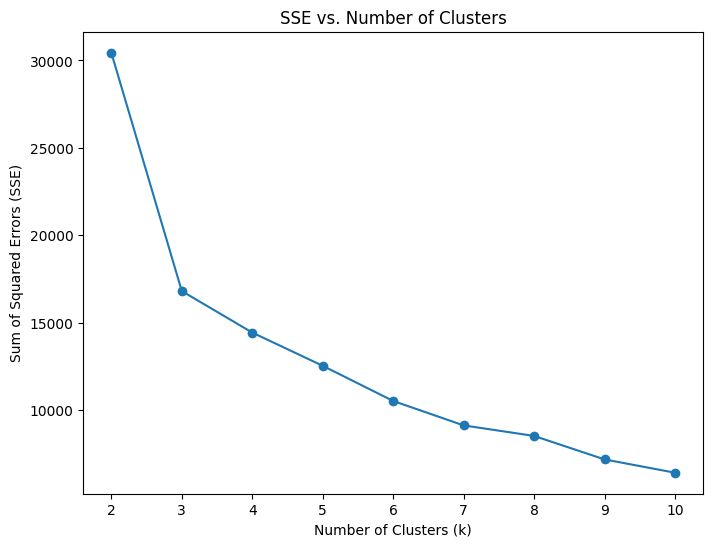

In [31]:
# Plotting SSE vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(candidate_k, sse_list, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()